<a href="https://colab.research.google.com/github/claracaspard/Data-Science-Projects/blob/main/Session%201/1.%20Data%20Manipulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## A Hands-on Workshop series in Machine Learning
### Session 1: Data Manipulation using pandas

### Meet the Instructor:
Dr. Aashita Kesarwani  
Current job: Data Scientist at Harvey Mudd College  
Background:  
- PhD in Mathematics from Tulane University (Number Theory)
- Undergraduate from IIT (Indian Institute of Technology) in Applied Mathematics    
- Visiting AI Researcher at [deepkapha.ai](https://www.linkedin.com/company/digitalis-kapha-b-v-/) in 2019

Please:
- feel free to interrupt to ask questions (if participating remotely, type in the chat window or raise your hand to speak)
- feel free to ask for help while working on problems
- feel free to Google and/or use any available tools (including AI-assisted programs such as [chatGPT](https://chat.openai.com/chat) or Github Copilot) while working on problems

If the Jupyter notebook or Python is not running in your laptop or you do not have all the required packages installed, you can use [Google Colab](https://colab.research.google.com/). Colab runs on the cloud in a web browser on Google machines.

---

##### What is machine learning?
- Learning from data without explicit programming.

##### How to approach a problem?
- Data exploration and feature engineering
- Model building, tuning and testing

---
    
#### Topics to be covered today (Data manipulation using `pandas`)
- A brief overview of Jupyter Notebook
- Pandas dataframes as the data structure for datasets
- Slicing dataframes using conditionals as well as iloc and loc methods.
- Statistical summary and exploration of dataframes
- Basic plots
- Feature engineering:
    - Detecting and filling missing values in the dataframes
    - Creating new features; using regular expressions for data extraction
    - Dropping rows/columns; replacing values of a column using a dictionary
- Merging columns from different datasets (Optional)

Today's session is meant to ease you into the very first step of the machine learning project - cleaning and exploring the data. The machine learning algorithms will be introduced from the next session, when we will start building models for classification tasks.

---

##### Structure of the session:

The notebook is divided into the following sections:  

1. Slicing rows and columns from the dataframe
2. Exploring the dataset (45 min exercise session)
3. Feature Engineering: Creating a new column for the titles of the passengers (30 min exercise session)
4. Merging columns from different datasets (Optional)

##### Note:
* Solutions for all the exercises (including the ones in the follow-along section) will be uploaded in the same folder of the [Github repository](https://github.com/AashitaK/A-Hands-On-Workshop-In-Machine-Learning-Fall-2023).
* Please give your feedback (form will shared with you after the workshop) and it will be gladly taken into account for the next sessions.

---
### Numpy Arrays

***Q: What are the `numpy` arrays? Why do we need them?***

`numpy` is one of the commonly used python modules/packages, which stands for numerical python. Numpy arrays are multidimensional arrays that are optimized for computing, especially for operations such as matrix multiplication.

To be able to use python modules, we first need to import them.

In [2]:
import numpy as np
import pandas as pd

# The following two modules matplotlib and seaborn are for plots
import matplotlib.pyplot as plt
import seaborn as sns # Comment this if seaborn is not installed
%matplotlib inline

# The module re is for regular expressions
import re

import warnings
warnings.filterwarnings('ignore')

### Pandas Dataframes

***Q: What are the*** `pandas` ***dataframes? Why do we need them? What is the crucial difference between numpy matrices and*** `pandas` ***dataframes?***

Pandas: an excellent tool to work with datasets

Dataframes: the central data structure of pandas library
- Evolved out of tables
- Most suitable for data manipulation tasks  

Pandas is built on top of numpy. The crucial difference between numpy matrices and pandas dataframes is that the columns in a Dataframe can be of different datatypes such as numerical, categorical, textual, etc.

First we load the [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) stored in the `csv` file as a dataframe using [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) function.

In [111]:

df = pd.read_csv('https://raw.githubusercontent.com/AashitaK/datasets/main/titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


As it turns out to be rather big dataset to display, we can comment the above cell by adding # in front of df and run it again to get rid of the output.

Next, let's check the numbers of rows and columns in the dataset.

In [5]:
df.shape

(891, 12)

So, the dataset consists of 891 rows and 12 columns.

We use `head()` function to peek into the first 5 rows (or any number of rows by using `head(n)`).

In [13]:
df.head()
#df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
876,877,0,3,"Gustafsson, Mr. Alfred Ossian",male,20.0,0,0,7534,9.8458,NaN,S
877,878,0,3,"Petroff, Mr. Nedelio",male,19.0,0,0,349212,7.8958,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C


The [Titanic dataset](https://www.kaggle.com/c/titanic) that we will explore today is sourced from a [Kaggle](https://www.kaggle.com/) beginner-level competition.  

Goal of the competition: To apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

[Description for the columns](https://www.kaggle.com/c/titanic/data) is as follows.  

|Variable|	Definition|	Key|   
|:---  |:--- |:---|
|PassengerId| Passenger ID |
|Survived| 	Survival|	0 = No, 1 = Yes |
|Pclass	|Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Sex	|Sex|
|Age	|Age in years	|
|SibSp	|# of siblings / spouses aboard the Titanic	|
|Parch	|# of parents / children aboard the Titanic	|
|Ticket	|Ticket number	|
|Fare	|Passenger fare	|
|Cabin	|Cabin number	|
|Embarked	|Port of Embarkation	|C = Cherbourg, Q = Queenstown, S = Southampton|

Q: What are the features?

Features are nothing but the variables in our model or the columns in our dataset. For example, `PClass`, `Age`, `Sex`, `Fare`, etc. are features for this particular dataset.

The final goal is to design a model to predict whether a passenger survives or not.
* Which of the above features seem like important predictors?
* How can you analyse the data in view of this objective?
    
Q: What is feature engineering?
* Detecting and handling missing values
* Encoding categorial features into numerical values
* Creating new features from the existing ones

---

### 1. Selecting rows and columns from the dataframe

How do we select a column from the dataframe? Say, we want to select the *Name* column from the dataframe.

Remember, we used square brackets for indexing lists, strings and numpy arrays in Python, for example `A[0]`.

In [14]:
df['Name'].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


Since we do not want all the rows in the output, we have used `head()` function at the end.

How do we select **multiple columns**? Suppose we want to select the columns *Name, Sex* and *Age* from the dataframe. Hint: Use a list of columns inside the square brackets.

In [17]:
L=['Name', 'Age', 'Sex']
df[L]
#df[['Name', 'Age', 'Sex']]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


In [18]:
df[['Name', 'Age', 'Sex']]

,Name,Age,Sex
0,"Braund, Mr. Owen Harris",22.0,male
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,female
2,"Heikkinen, Miss. Laina",26.0,female
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,female
4,"Allen, Mr. William Henry",35.0,male
...,...,...,...
886,"Montvila, Rev. Juozas",27.0,male
887,"Graham, Miss. Margaret Edith",19.0,female
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,female
889,"Behr, Mr. Karl Howell",26.0,male


We can also select **rows** by putting a certain **condition on a column**. Say, we want only those rows for which the gender is *'female'*.

In [ ]:
df[df["Sex"] == "female"].head(3)

Now, we want to retrieve only the female passengers traveling in the first class. Hint: Add another conditional `df['Pclass']==1` to the above code using the operator `&` and make sure to wrap the two conditionals with parenthesis `()`.

In [23]:
df[(df["Sex"] == "female")&(df["Pclass"]==1)]
df[(df["Sex"] == "female")&(df["Pclass"]==1)].shape[0] #number of rows
df[(df["Sex"] == "female")&(df["Pclass"]==1)].shape[1] #number of columns

12

We can also get the number of passengers using the shape method which gives us both the number of columns and the number of rows. Write the code to count the number of female passengers traveling in the first class.

#### The `loc` and `iloc` methods
So far, we have seen how to retrieve:
* some select columns, or
* certain rows based on conditionals.

What if we want to slice off a portion of the dataframe with some specific rows **and** columns? We use `.loc[]` or `.iloc[]` methods for this purpose.
* `.iloc[]` method is primarily integer position based and gets rows/columns at particular positions in the index (so it **only takes integers** as index).
* `loc[]` method is label based and gets rows/columns with particular labels from the index. Thus, it can be used to **put conditions on rows and retrieve select columns simultaneously**.

For example, we want to get the name and the survival information for all the adults above 70 years.

In [24]:
df.loc[df['Age']>70, ['Name', 'Survived']]

,Name,Survived
96,"Goldschmidt, Mr. George B",0
116,"Connors, Mr. Patrick",0
493,"Artagaveytia, Mr. Ramon",0
630,"Barkworth, Mr. Algernon Henry Wilson",1
851,"Svensson, Mr. Johan",0


Write the code to retrieve the **name, age and survival** information for all the **female passengers traveling in the first class**.

In [33]:
#df.loc[(df[["Sex"] == 'female') & (df['Pclass'] == 1)], ['Name', 'Age', 'Survived']]

df.loc[(df["Sex"] == "female")&(df["Pclass"]==1),['Name', 'Age', 'Survived']]

,Name,Age,Survived
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1
11,"Bonnell, Miss. Elizabeth",58.0,1
31,"Spencer, Mrs. William Augustus (Marie Eugenie)",NaN,1
52,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",49.0,1
...,...,...,...
856,"Wick, Mrs. George Dennick (Mary Hitchcock)",45.0,1
862,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",48.0,1
871,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1
879,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,1


The `iloc[]` method let us retrieve rows by passing sequence of indexes. For example, we can select the rows numbered 100th to 105th. The indexing works exactly like python lists and numpy arrays.

In [ ]:
df.iloc[100:106]

Write the code to retrieve every 100th row from the dataframe.

In [32]:
df.iloc[0::100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
100,101,0,3,"Petranec, Miss. Matilda",female,28.0,0,0,349245,7.8958,NaN,S
200,201,0,3,"Vande Walle, Mr. Nestor Cyriel",male,28.0,0,0,345770,9.5000,NaN,S
300,301,1,3,"Kelly, Miss. Anna Katherine ""Annie Kate""",female,NaN,0,0,9234,7.7500,NaN,Q
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
500,501,0,3,"Calic, Mr. Petar",male,17.0,0,0,315086,8.6625,NaN,S
600,601,1,2,"Jacobsohn, Mrs. Sidney Samuel (Amy Frances Chr...",female,24.0,2,1,243847,27.0000,NaN,S
700,701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S


Write the code to retrieve the last 10 rows from the dataframe using `iloc[]` method.

In [37]:
df.iloc[-10::]
#df.tail(10)
df.iloc[881:891]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


---

## Instructions for the exercise session:
- There are two exercise sections (section 2 and 3) below and they are alloted 45 min and 30 min respectively.
- The exercise involves new concepts not covered in the guided session above. Please feel free to ask questions and take help from me and/or your peers in the breakout room.
- The hints are provided for the each of the exercises. The built-in functions to be used for them are provided with a clickable link to the user manual.
- The exercise sessions are time-bound and you are encouraged to work in groups to speed things up!
- If you finished a section early, move on to the next one. There is an optional section 4 at the end.

---

### 2. Exploring the dataset (45 min)

Use [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function for numerical features (columns) to get a brief overview of the statistics of the data.

In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Do the same as above for qualitative (non-numerical) features. Hint: Use `include=['O']` parameter in the [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) function.

In [44]:
df.describe(include=['O'])


,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


 Use the built-in pandas function to count the number of surviving and non-surviving passengers. Hint: Use [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) on the column `df['Survived']`.

In [47]:
df.value_counts('Survived')
#df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Below is a pie chart of the same using `matplotlib`:

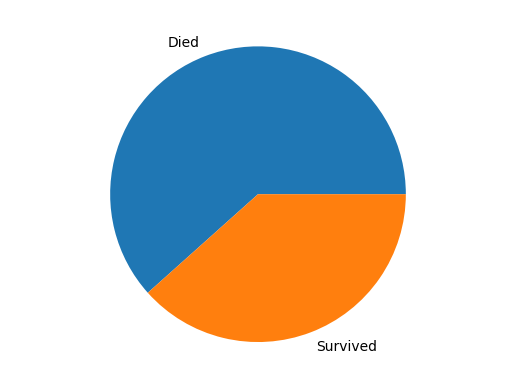

In [48]:
plt.axis('equal')
plt.pie(df['Survived'].value_counts(), labels=('Died', "Survived"));
plt.show()

Below is a bar chart for the survival rate among male and female passengers using `seaborn` which we imported above as `sns`. Here is [Seaborn cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Seaborn_Cheat_Sheet.pdf).

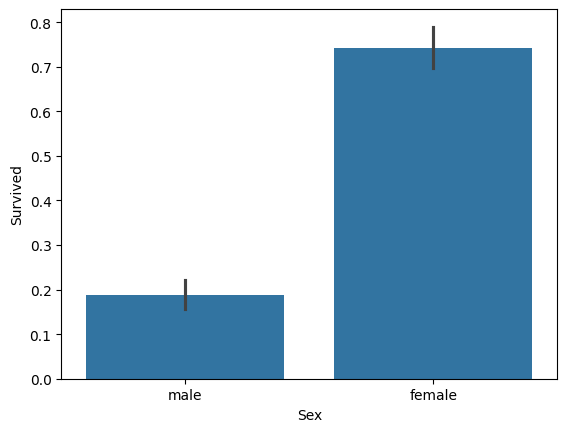

In [49]:
sns.barplot(x = 'Sex', y = 'Survived', data = df);
plt.show()

In [51]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Plot the survival rate among passengers in each ticket class.

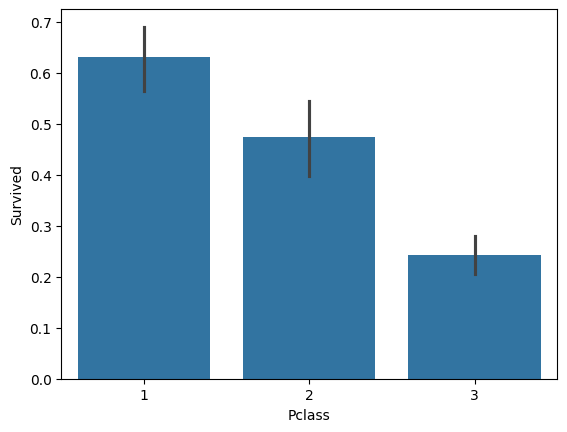

In [52]:
sns.barplot(x = 'Pclass', y = 'Survived', data = df);
plt.show()

We can also check the survival rate among both genders within the three ticket classes as follows.

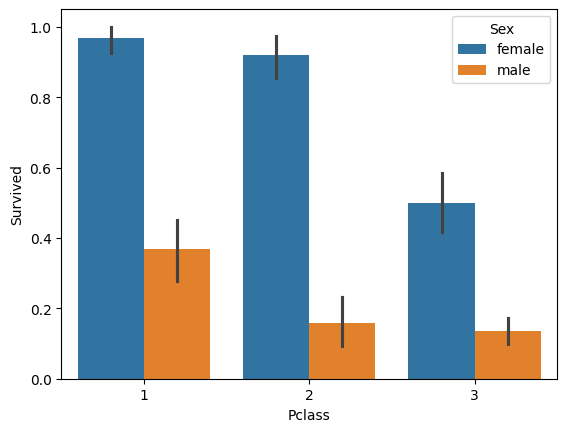

In [53]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df);

From the above chart, do you think that the gender affect the chance of survival for all the three ticket classes equally? Or does it seem like gender's effect is more pronounced for a certain ticket class passengers than others? We plot the  point estimates and confidence intervals for each sub-category to see it more clearly.

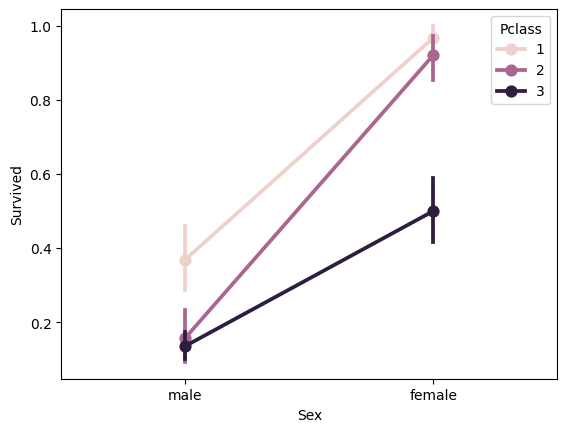

In [54]:
sns.pointplot(x='Sex', y='Survived', hue='Pclass', data=df);

Notice the steeper slope for the second class.

It seems that gender and ticket class put together give more information about the survival chance than both of them separately. Please feel free to later explore other variables and combination of variables in depth in your own time.

How many children were on board? Hint: Use indexing on rows using conditional on the *Age* column and then the [`shape`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shape.html) method to count the rows as seen above.

In [80]:
#df["Age"]<18.shape
#df["Age"]<18
#df.head()
#df[df["Age"]<=18, ["Name", "Age", "Survived"]]
df[df["Age"] <= 18].shape

(139, 12)

How many of the children on board survived? Hint: Add another conditional for the *Survived* column to the above code.

In [81]:
df[(df["Age"] <= 18) & (df["Survived"] == 1)].shape

(70, 12)

Use the functions [`isnull()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isnull.html) and [`sum()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html) chained one after the other on the dataframe to find out the number of missing values in each column.

In [82]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


**Detecting missing values** is an important first step in Feature Engineering, that is preparing the features (independent variables) to use for building the machine learning models.

The next step is **handling those missing values**. An option is to drop the rows or columns that have some or a lot of missing values, but that also means discarding relevant information. Another option is to fill them with something appropriate.

Discuss:
1. What are the pros and cons of dropping the rows and/or columns with missing values?
    - Should you drop none, all or some of the columns with missing values for this dataset in view of building the predictive model?
    - Ditto for rows with missing values.
3. If you consider filling the missing values, what are the possible options?
    - Can you make use of other values in that column to fill the missing values?
    - Can you make use of other values in that row as well as values in that column to fill the missing values
4. Can the title in the name column be used for guessing a passengers' age based on the age values of other passengers with the same title?

What is the most common port of embarkment? Hint: Check the frequency (counts) of each value in the Embarked column using the built-in function [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html) as seen above.

In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


As we saw above, there are missing values in the column for *Embarked*. Fill them with the most commonly occuring value. Hint: Use [`fillna()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html).

In [99]:
df["Embarked"].fillna("S", inplace=True)

Let us check whether the missing values for the *Embarked* column is indeed filled.

In [100]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


If not, there are two options to fix this. One is to set `inplace` parameter in the `fillna()` function as `True` and another is to use assignment operator `=` as in `df = df.function()`.

***Question***: Why is the `inplace` keyword False by default? This is true not just for `fillna()` but for most built-in functions in pandas.

Answer: To facilitate method chaining or piping i.e. invoking multiple operations one after the other. For example, `df.isnull().sum()` used above. Chaining is more commonly used in pandas as compared to another programming style i.e. using nested function calls. Please read more [here](https://towardsdatascience.com/the-unreasonable-effectiveness-of-method-chaining-in-pandas-15c2109e3c69), if interested.

We should remove the *Cabin* column from the DataFrame -- too many values are missing. Hint: Use [`drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) with appropriate value for the `axis` keyword.

In [112]:
df.drop("Cabin", axis=1, inplace=True)
#df.isnull().sum()
#df.head()


Let us check whether the column is indeed dropped. If not, modify the code above accordingly.

In [113]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


What is the age of the oldest person on board?

In [98]:
df.loc[df['Age'].idxmax(), "Age"]

80.0

Find all the passenger information for the oldest person on board. Hint: Use [`loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method with [`idxmax()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.idxmax.html) for the Age column.

In [115]:
df.loc[df['Age'].idxmax()]

,630
PassengerId,631
Survived,1
Pclass,1
Name,"Barkworth, Mr. Algernon Henry Wilson"
Sex,male
Age,80.0
SibSp,0
Parch,0
Ticket,27042
Fare,30.0


---

### 3. Feature Engineering: Creating a new column for the titles of the passengers (30 min)

The real-world datasets many-a-times contain useful information in the textual format. Text mining is an important area of data science and one of the most powerful tool is [regular expressions](https://www.gnu.org/software/sed/manual/html_node/Regular-Expressions.html) that are not specific to python, but have much wider applications.

In this section, you are going to create a new feature for the titles of the passengers derived from their names using regular expressions. For that, let us first take a look at the passengers' names.

In [118]:
df.loc[:20, 'Name'].values
#df.loc[20:,"Age"].values

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J'], dtype=object)

We notice one of the identifying characteristics of the titles above are that they end with a period. Regular expressions are very useful in the process of such data extraction and we will use them using the python module `re` to extract the titles from the *Name* column. We will first use regular expressions characters to construct a pattern and then use built-in function `findall` for pattern matching.

Some useful regular expression characters:
- `\w`: pattern must contain a word character, such as letters.
- `[ ]`: pattern must contain one of the characters inside the square brackets. If there is only one character inside the square brackets, for example `[.]`, then the pattern must contain it.

Let's try this.

In [119]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')

['Mr.']

It worked! It returned a list instead of the string, so we use indexing to get the first element of the list.

In [120]:
re.findall("\w\w[.]", 'Braund, Mr. Owen Harris')[0]

'Mr.'

Let us try it on another name:

In [122]:
re.findall("\w\w[.]", 'Heikkinen, Miss. Laina')[0]

'ss.'

So, we want a pattern that automatically detects the length of the title and returns the entire title.

For regular expressions, \+ is added to a character/pattern to denote it is present one or more times. For example, `\w+` is used to denote one or more word characters. Fill in the regular expression in the below cell that will detect a period preceeded by one or more word characters.

In [123]:
# Fill in below:
re.findall("\w\w+[.]", 'Heikkinen, Miss. Laina')[0]

'Miss.'

The output should be `'Miss.'`

Summary: For pattern matching the titles using regular expressions:
- First we make sure it contains a period by using `[.]`.
- Secondly, the period must be preceeded by word characters (one or more), so we use `\w+[.]`.

Write a function `get_title` that takes a name, extracts the title from it and returns the title.

In [147]:
def get_title(x):
  return re.findall("\w\w+[.]",x)[0]

Check that the function is working properly by running the following two cells.

In [127]:
get_title('Futrelle, Mrs. Jacques Heath (Lily May Peel)')

'Mrs.'

The output should be `'Mrs.'`. Note: Make sure that the funtion returns a string and not a list. Please modify the above function accordingly.

In [128]:
get_title('Simonius-Blumer, Col. Oberst Alfons')

'Col.'

The output should be `'Col.'`.

Create a new column named Title and extract titles from the Name column using the above function `get_title`. Hint: Use built-in [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function. The syntax is `df['New_column'] = df['Relevant_column'].map(function_name)`.

In [148]:
df['Title'] = df['Name'].map(get_title)

Let us peek into the dataframe.

In [130]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr.


List all the unique values for the titles along with their frequency. Hint: Use an inbuilt pandas function

In [131]:
df["Title"].value_counts()

,count
Title,
Mr.,517
Miss.,182
Mrs.,125
Master.,40
Dr.,7
Rev.,6
Mlle.,2
Major.,2
Col.,2


Now, we want to replace the various spellings of the same title to a single one. Hint: Use the below dictionary with the [`replace`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html) function

`title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.',
              'Dr.': 'Rare', 'Mme.': 'Mrs.',
              'Major.': 'Rare', 'Lady.': 'Rare',
              'Sir.': 'Rare', 'Col.': 'Rare',
              'Capt.': 'Rare', 'Countess.': 'Rare',
              'Jonkheer.': 'Rare', 'Dona.': 'Rare',
              'Don.': 'Rare', 'Rev.': 'Rare'}`

In [159]:
title_dictionary = {'Ms.': 'Miss.', 'Mlle.': 'Miss.', 'Dr.': 'Rare', 'Mme.': 'Mrs.', 'Major.': 'Rare', 'Lady.': 'Rare', 'Sir.': 'Rare', 'Col.': 'Rare', 'Capt.': 'Rare', 'Countess.': 'Rare', 'Jonkheer.': 'Rare', 'Dona.': 'Rare', 'Don.': 'Rare', 'Rev.': 'Rare'}
df.replace({"Title": title_dictionary}, inplace=True)


List all the unique values for the titles along with their frequency to check that the titles are replaced properly.

In [160]:
df["Title"].value_counts()

,count
Title,
Mr.,517
Miss.,185
Mrs.,126
Master.,40
Rare,23


What is the median age of passengers? Hint: Use the inbuilt function [`median`](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html).

In [154]:
df["Age"].median()

28.0

What is the median age of passengers with the title 'Miss.'? Hint: Use [`loc[]`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html) method for slicing off the select rows and the *Age* column.

In [157]:
df.loc[df["Title"] == "Miss.", 'Age'].median()

21.0

What is the median age of passengers with the title 'Mrs.'?

In [158]:
df.loc[df["Title"] == "Mrs.", 'Age'].median()

35.0

Is there a noticeble difference in the median ages for the passengers with the above two titles? Should we take titles into account while filling the missing values for the *Age* column? If yes, how?

This is the end of the exercise session. If you finished early, move on to the next notebook for merging datasets.

---

#### Acknowledgment:
* [Titanic dataset from Kaggle](https://www.kaggle.com/c/titanic) dataset openly available in Kaggle is used in the exercises.